# Predicting House Value in Boston

>#### Authors: Hrithik Soni, Jonathan Tuazon, Peter Lee, Tanay Kumar

## 1. Introduction

   We all know that housing prices all over the world have seen a monumental rise. Boston is just another example where this
problem has been made worse because of the rising prices and falling supplies. In his article, Andrew Brinker says, "The gap between the haves and the have-nots has widened in the housing market." 

   There is constant frustation for buyers in the housing market and it is very difficult for them to filter houses based on what they require out of the house. There is no marketplace that prepares a buyer on what their budget should be for a house with their given criterias. It is no secret that housing prices, especially in Boston, have reached unprecedented heights, and it is difficult for a buyer to know what their budget should be based on just a few of their requirements. It is also difficult for the buyer to know which factors weigh in heavily when deciding a budget and which don't. (Brinker, 2022)

### Research question and motivation

   And this is what has pushed us for our project. We wanted to create a data model that models on the "Boston Housing dataset" and helps predict the value of a house given certain parameters.
   
**Research Question**: Which explanatory variables that describe the characteristics of a house are the most influential in predicting the median value of a house in Boston?
   
   The research question for our project aims at finding the most optimal data model that accurately predicts the median value of a house from the dataset that someone is interested in using the set parameters a regular buyer has when looking at a house. We want to include the most influential variables based on our analysis. For example, number of rooms, how is the neighbourhood etc. We want to find the best model that predicts the median house value of a house in Boston given the set of explanatory variables values.
   
   The response variable is Median House Value (in 1000$) in Boston housing dataset.
   
   
   

### Possible influential explanatory variables

We selected a few variables from the boston housing dataset that we assumed would be the most influential in predecting the median house value. Some variables are directly related to the house that might affect the median value of the house, like Average Rooms per dwelling, age etc. There are some indirect variables that relate to the neighbourhood of the house, hence affecting the value of the house. For example, per capita crime rate by town

## 2. Exploratory Data Analysis

In [1]:
options(repr.plot.width=8, repr.plot.height=6)
library(broom)
library(tidyverse)
library(infer)
library(repr)
library(digest)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(AER)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif


The following object is masked from ‘package:dplyr’:

    recode



Reading dataset and assigning names to each column

In [2]:
boston_data <-read_tsv("dataset.txt",
                      col_names=FALSE) %>%
    separate(col=X1,
             into=c("CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","LSTAT","MEDV"),
             sep="  ") %>%
    separate(col=PTRATIO,
             into=c("PTRATIO","B"),
             sep=" ") %>%
    mutate_if(is.character,as.numeric) 

head(boston_data)

Rows: 506 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Expected 13 pieces. Additional pieces discarded in 24 rows [103, 156, 157, 417, 420, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 437, 439, 446, 451, 455, ...].”
Warning message:
“Expected 13 pieces. Missing pieces filled with `NA` in 42 rows [9, 24, 32, 58, 142, 143, 144, 146, 147, 152, 159, 160, 210, 259, 260, 352, 353, 354, 355, 356, ...].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 59 rows [9, 24, 32, 103, 142, 143, 144, 146, 147, 152, 156, 157, 210, 368, 374, 375, 380, 383, 384, 387, ...].”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning mess

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Correlation Matrix

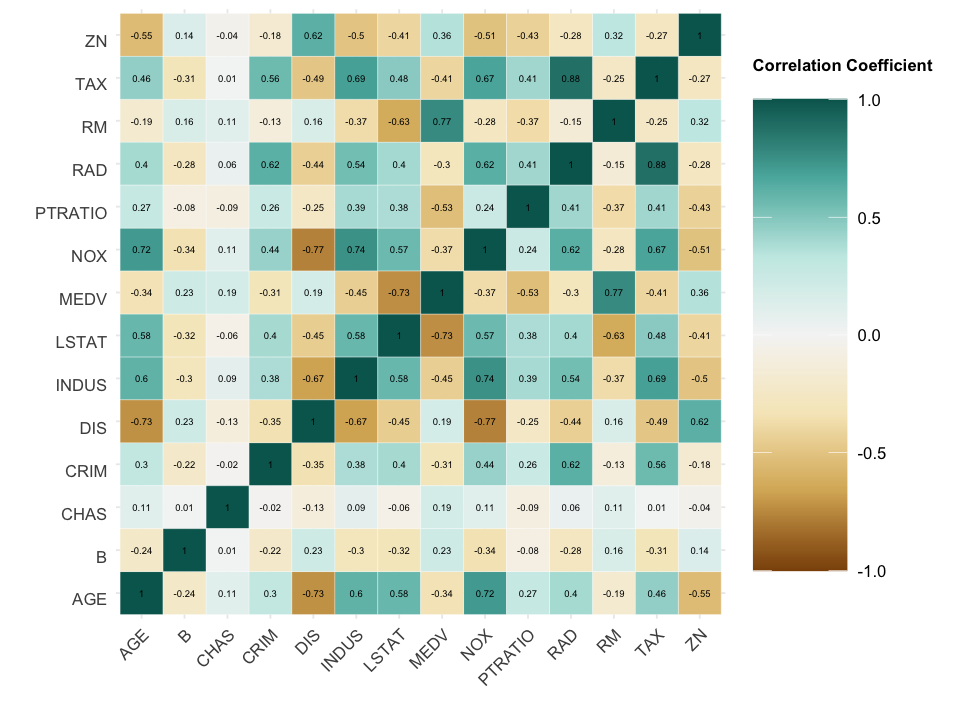

In [3]:
corr_mat <- boston_data %>%
    cor(use="complete.obs") %>%
    as.data.frame() %>%
    rownames_to_column("var1") %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_corr_mat <- corr_mat %>%
    ggplot(aes(var1,var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
    palette = "BrBG",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 10, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 10, hjust = 1
    ),
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 10),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 2)
plot_corr_mat

Based on the correlation matrix, we can see some of the covariates like TAX and RAD are highly correlated. We won't be removing any covariates in the preprocessing stage as we will let the model selection algorithm to decide which variables are influential and which are not. Furthermore, since our goal is prediction, multicopllinearity won't be a major issue for us.

Since all of our model selection (stepwise, Lasso) that we will be performing in the Methods section doesn't accept categorical variables as input, we decided to remove the CHAS variable. Since CHAS was our only categorical variable, we believe that removing it won't make a significant difference to our analysis given from the correlation matrix that it has a very low correlation with the response variable (MEDV).

In [4]:
boston_data <- boston_data %>% select(-CHAS)

The dataset has missing entries (NA) which we will remove from the dataset. 

In [5]:
boston_data <- na.omit(boston_data)

## 3. Methods and Results

Splitting dataset into training and testing datasets (70/30 split)

In [6]:
# Split data into training and test sets
set.seed(301)

boston_data$ID <- rownames(boston_data)

training_boston <- sample_n(boston_data, size = nrow(boston_data) * 0.70,
  replace = FALSE
)

testing_boston <- anti_join(boston_data,
  training_boston,
  by = "ID"
)

# Remove variable "ID"
training_boston <- training_boston  %>% select(-ID)
testing_boston <- testing_boston  %>% select(-ID)

### Full OLS

Using `lm` to build a full regression model (including all explanatory variables)

In [7]:
boston_OLS <- lm(MEDV ~ ., data = training_boston)

Using OLS model to get fitted values on test set

In [8]:
boston_test_OLS <- predict(boston_OLS, testing_boston)

Computing out-of-sample error (RMSE)

In [9]:
boston_OLS_MSE <- tibble(
    Model = "OLS Full Regression",
    R_MSE = rmse(
      preds = boston_test_OLS,
      actuals = testing_boston$MEDV)
    )

boston_OLS_MSE

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,4.545244


### Forward/Backward Selection

In this section, we will be using the forward and backward selection algorithm to determine which variables to consider in our reduced model. The forward selection algorithm will be used first, then the backward selection algorithm will follow. First, the regsubsets function is used for this process and 12 input variables are used for variable selection. This is because there are 13 variables in the original dataset, but 1 of them is the response variable; thus, we have 12 input variables.

In [10]:
boston_forward_sel <- regsubsets(
  x = MEDV ~ ., 
  nvmax = 12,
  data = training_boston,
  method = "forward",
)

boston_forward_sel <- summary(boston_forward_sel)
boston_forward_sel

Subset selection object
Call: regsubsets.formula(x = MEDV ~ ., nvmax = 12, data = training_boston, 
    method = "forward", )
12 Variables  (and intercept)
        Forced in Forced out
CRIM        FALSE      FALSE
ZN          FALSE      FALSE
INDUS       FALSE      FALSE
NOX         FALSE      FALSE
RM          FALSE      FALSE
AGE         FALSE      FALSE
DIS         FALSE      FALSE
RAD         FALSE      FALSE
TAX         FALSE      FALSE
PTRATIO     FALSE      FALSE
B           FALSE      FALSE
LSTAT       FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: forward
          CRIM ZN  INDUS NOX RM  AGE DIS RAD TAX PTRATIO B   LSTAT
1  ( 1 )  " "  " " " "   " " "*" " " " " " " " " " "     " " " "  
2  ( 1 )  " "  " " " "   " " "*" " " " " " " " " " "     " " "*"  
3  ( 1 )  " "  " " " "   " " "*" " " " " " " " " "*"     " " "*"  
4  ( 1 )  " "  " " " "   " " "*" " " "*" " " " " "*"     " " "*"  
5  ( 1 )  "*"  " " " "   " " "*" " " "*" " " " " "*"     " " "*"  
6  (

The Cp for each number of variables is compared in the table below. By doing this, the optimal Cp value can be obtained and be used in the reduced model. From the table, below, the optimal number of variables is 10, since it has the lowest CP value. The variables selected for the reduced model are CRIM, ZN, INDUS, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT.

In [11]:
boston_forward_df <- tibble(
    n_input_variables = 1:12,
    Cp = boston_forward_sel$cp
)
boston_forward_df

n_input_variables,Cp
<int>,<dbl>
1,198.31356
2,92.04141
3,52.08699
4,41.35422
5,28.24856
6,19.15319
7,19.38127
8,19.56012
9,12.64055


From here, a linear model is fit with the 10 chosen varaibles. Then a prediction is made using the reduced linear model and the testing set. Finally, the root mean squared error is calculated through the reduced OLS model.

In [12]:
boston_red_OLS_for <- lm(MEDV~CRIM+ZN+INDUS+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT,
  data = training_boston
)
boston_pred_red_OLS_for <- predict(boston_red_OLS_for, testing_boston)

In [13]:
boston_R_MSE_forward <- tibble(
    Model = "OLS Reduced Regression Forward",
    R_MSE = rmse(
        preds = boston_pred_red_OLS_for,
        actuals = testing_boston$MEDV
        )
    )
boston_R_MSE_forward

Model,R_MSE
<chr>,<dbl>
OLS Reduced Regression Forward,4.588368


Now the backward selection algorithm will be used. The code is very similar to the forward selection algorithm's code; however, this algorithm starts with all of the variables, and removes some of them from the full model to create the reduced model.

In [14]:
boston_backward_sel <- regsubsets(
  x = MEDV ~., 
  nvmax=12,
  data=training_boston,
  method="backward"
)

boston_backward_sel <- summary(boston_backward_sel)
boston_backward_sel

Subset selection object
Call: regsubsets.formula(x = MEDV ~ ., nvmax = 12, data = training_boston, 
    method = "backward")
12 Variables  (and intercept)
        Forced in Forced out
CRIM        FALSE      FALSE
ZN          FALSE      FALSE
INDUS       FALSE      FALSE
NOX         FALSE      FALSE
RM          FALSE      FALSE
AGE         FALSE      FALSE
DIS         FALSE      FALSE
RAD         FALSE      FALSE
TAX         FALSE      FALSE
PTRATIO     FALSE      FALSE
B           FALSE      FALSE
LSTAT       FALSE      FALSE
1 subsets of each size up to 12
Selection Algorithm: backward
          CRIM ZN  INDUS NOX RM  AGE DIS RAD TAX PTRATIO B   LSTAT
1  ( 1 )  " "  " " " "   " " "*" " " " " " " " " " "     " " " "  
2  ( 1 )  " "  " " " "   " " "*" " " " " " " " " " "     " " "*"  
3  ( 1 )  " "  " " " "   " " "*" " " " " " " " " "*"     " " "*"  
4  ( 1 )  " "  " " " "   " " "*" " " "*" " " " " "*"     " " "*"  
5  ( 1 )  "*"  " " " "   " " "*" " " "*" " " " " "*"     " " "*"  
6  (

The Cp values are compared in a table with the number of input variables. Similar to the foward selection algorithm, the optimal number of input variables is 9 because the Cp value is the lowest. The variables that will be used are CRIM, ZN, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT.

In [15]:
boston_backward_df <- tibble(
    n_input_variables = 1:12,
    Cp = boston_backward_sel$cp
)
boston_backward_df

n_input_variables,Cp
<int>,<dbl>
1,198.313561
2,92.041409
3,52.086988
4,41.354218
5,28.248563
6,27.883890
7,18.664963
8,10.743071
9,8.691499


After determining the optimal number of variables through the backward selection algorithm, we can fit a linear model with the selected variables. Then we can predict with the reduced model and the testing set.

In [16]:
boston_red_OLS_bac <- lm(MEDV~CRIM+ZN+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT,
  data = training_boston
)
boston_pred_red_OLS_bac <- predict(boston_red_OLS_bac, testing_boston)


Then we can compute the RMSE for the reduced model.

In [17]:
boston_R_MSE_backward <- tibble(
    Model = "OLS Reduced Regression Backward",
    R_MSE = rmse(
        preds = boston_pred_red_OLS_bac,
        actuals = testing_boston$MEDV
        )
    )
boston_R_MSE_backward

Model,R_MSE
<chr>,<dbl>
OLS Reduced Regression Backward,4.587922


### Variable Selection using LASSO 

Building matrix and vector using training set (training_boston) as it is required by `glmnet`

In [18]:
boston_X_train <- model.matrix(MEDV ~ ., data = training_boston)[, -1]
boston_Y_train <- training_boston %>% select(MEDV) %>% as.matrix()

boston_X_test <- model.matrix(MEDV ~ ., data = testing_boston)[, -1]
boston_Y_test <- testing_boston %>% select(MEDV) %>% as.matrix()

Using `cv.glmnet` to do cross validation with k = 10 folds to find the best lambda ($\lambda$) 

In [19]:
lasso_cv <-
    cv.glmnet(boston_X_train, 
              boston_Y_train, 
              alpha = 1)

lasso_cv


Call:  cv.glmnet(x = boston_X_train, y = boston_Y_train, alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index Measure    SE Nonzero
min 0.0274    61   19.19 4.273      11
1se 1.1309    21   23.35 5.243       4

Plot: CV Mean square error (MSE) over a range of $\log(\lambda)$ values

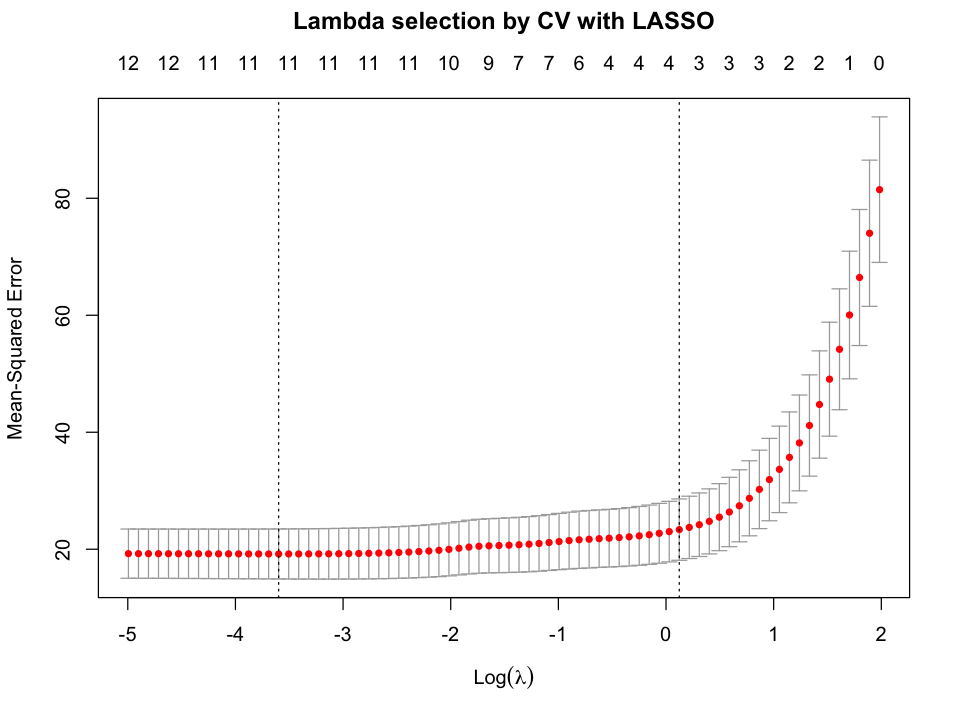

In [20]:
plot(lasso_cv, main = "Lambda selection by CV with LASSO\n\n")

The above plot shows the values of MSE obtained over different values of lambda. The vertical line on the left represents lambda that gives the lowest MSE and the vertical line on the right represents lambda which is within one standard error of the minimum MSE.

Obtaining $\lambda$ that minimizes MSE ($\lambda_{min}$) and the largest $\lambda$ such that it is within one standard error of the minimum MSE ($\lambda_{1se}$).

In [21]:
lambda_min <- lasso_cv$lambda.min
lambda_1se <- lasso_cv$lambda.1se

Plot: Estimated regression coefficients over the $\lambda$-grid where the vertical red line is $\log(\lambda_{min})$ and the blue line is $\log(\lambda_{1se})$

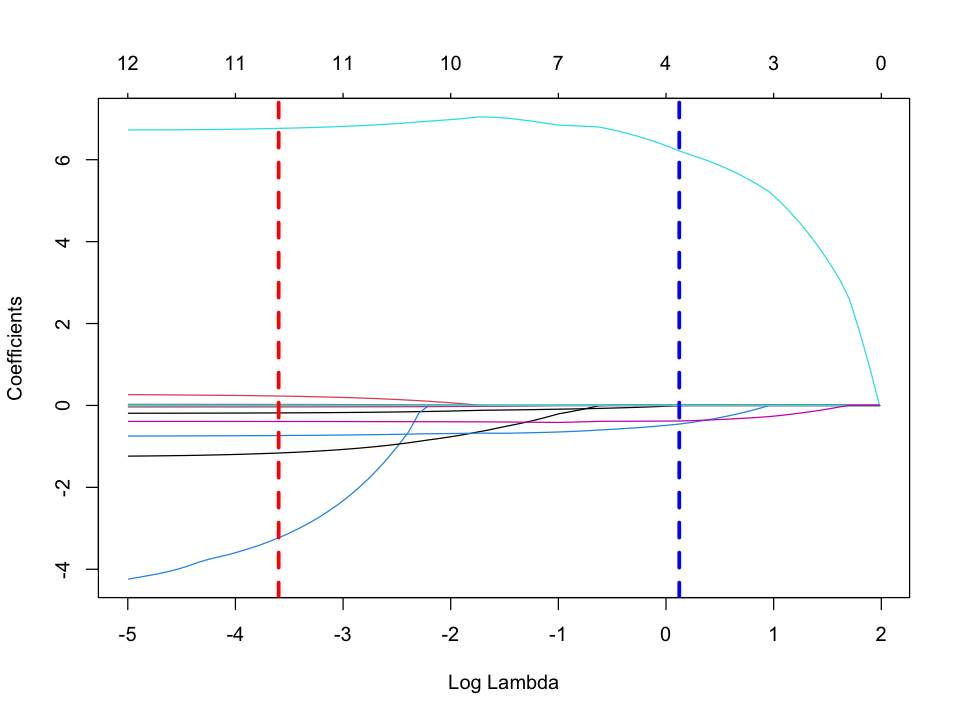

In [22]:
plot(lasso_cv$glmnet.fit, "lambda")
abline(v = log(lambda_min), col = "red", lwd = 3, lty = 2)
abline(v = log(lambda_1se), col = "blue", lwd = 3, lty = 2)

The plot above shows variable selection done by lasso. The red line ($\lambda_{min}$) selects 11 explanatory variables whereas the blue line ($\lambda_{1se}$) selects 4 explanatory variables.

We use the $\lambda_{min}$ and $\lambda_{1se}$ obtained from cross validation to fit their corresponding lasso models.

In [23]:
# Using lambda.min
boston_LASSO_min <- glmnet(
  x = boston_X_train, y = boston_Y_train,
  alpha = 1,
  lambda = lambda_min
)

# Using lambda.1se
boston_LASSO_1se <- glmnet(
  x = boston_X_train, y = boston_Y_train,
  alpha = 1,
  lambda = lambda_1se
)

Using `predict` to get fitted values of the test set using our Lasso models.

In [24]:
boston_test_LASSO_min <- predict(boston_LASSO_min,
  newx = boston_X_test)

boston_test_LASSO_1se <- predict(boston_LASSO_1se,
  newx = boston_X_test)

Calculating out-of-sample error (RMSE) of both models.

In [25]:
boston_LASSO_MSE <- rbind(
    tibble(
    Model = "LASSO Regression with minimum MSE",
    R_MSE = rmse(
      preds = boston_test_LASSO_min,
      actuals = testing_boston$MEDV))
    ,
    tibble(
    Model = "LASSO Regression with 1 SE of minimum MSE",
    R_MSE = rmse(
      preds = boston_test_LASSO_1se,
      actuals = testing_boston$MEDV)
    )
)
boston_LASSO_MSE

Model,R_MSE
<chr>,<dbl>
LASSO Regression with minimum MSE,4.547264
LASSO Regression with 1 SE of minimum MSE,4.868462


Based on the results above, it is clear that Lasso regression with $\lambda_{min}$ performs better since it has a lower RMSE.

## 4. Discussion

### Comparing RMSE between all predictive models

In [26]:
rmse_models <- rbind(boston_OLS_MSE, 
                     boston_R_MSE_forward, 
                     boston_R_MSE_backward,
                     boston_LASSO_MSE)

rmse_models

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,4.545244
OLS Reduced Regression Forward,4.588368
OLS Reduced Regression Backward,4.587922
LASSO Regression with minimum MSE,4.547264
LASSO Regression with 1 SE of minimum MSE,4.868462


Discussion:
 
Firstly, we will be using ordinary least squares regression to be able to compute our values. Then in order to verify or strengthen our regression by using forward,backward selection and LASSO variable selection. In order to determine which prediction model fits the best, we will be calculating Root Mean Square Error(RMSE) of each model to see the difference between the predictive value and the actual value from the model. The value we got from the OLS regression without selection is 4.545244. After using forward and backward selection we picked out the lowest Cp value we got 4.587922 from backward and 4.588368 from forward. We then used LASSO selection to determine the most correlated variables. By obtaining the lambda min and standard error. After the selection from LASSO (minimum MSE), we get the value of 4.547264. We see that all the values that we got from each variable selection of the linear regression are all very similar and no large differences between them. 
 
However, we see that the Ordinary least squares(OLS) had the lowest RMSE. This means that the model for prediction is closer to linear and also most if not all variables are highly correlated to the model. As through each variable selection the RMSE becomes larger. The results were not what we were expecting as we believe that either LASSO or backward/forward selection would be able to provide us with a much lower RMSE. Our group believes that this result may be caused by too many variables in the data therefore the more variables we include the more likely that they will follow a linear regression. Moreover, in LASSO selection when there are multiple highly correlated variables LASSO will only randomly pick one thus leading to other more correlated variables being ignored and picking other variables that are not relevant and eventually leading to a larger RMSE. However, we observed that the difference in RMSE between OLS Full Regression and LASSO Regression with minimum MSE is very small. It is possible that this difference in RMSE could just be due to the split of the dataset used to compute it. To improve our study in the future we could use multiple/different split test sets and check if we get similar results or not. 

Furthermore, there were several limitations to our project. Since one of the variables in the dataset was categorial therefore we had to remove it since it doesn’t work well with LASSO and forward/backward selection as all other variables are numeral. However, after the project learned that with the addition of gglasso, a package in R, we are able to include categorical values in such modeling and selection. Thus, we could have included all the variables in the dataset for a better fit of the model. 
In the future, we can improve our model by implementing elastic net into our LASSO selection. Which is a combination of ridge and LASSO regression and instead of randomly picking correlated variables, it is able to group the correlated variables and therefore selecting the most correlated ones in each group. Moreover, instead of only measuring the RMSE value of each model, we can measure the Adjusted R Square and the F-test value. Later on, we can explore how these variables are able to impact housing in other states in the US or other countries and not just limited to Boston. We can also explore the likelihood of this model to predict housing on brand new neighborhoods to be able to determine its price point before building it. 
 
 


## 5. References

1. Boston Housing Market: House Prices &amp; Trends | Redfin. (n.d.). Retrieved November 4, 2022, from https://www.redfin.com/city/1826/MA/Boston/housing-market 

2. Brinker, A. (2022, October 26). Six things we learned about Greater Boston's housing crisis from the New Boston Foundation Report Card - The Boston Globe. BostonGlobe.com. Retrieved December 9, 2022, from https://www.bostonglobe.com/2022/10/26/business/six-things-we-learned-about-bostons-housing-crisis-new-boston-foundation-housing-report-card/ 

3. Vishal, V. (2017, October 27). Boston Housing Dataset. Kaggle. Retrieved November 3, 2022, from https://www.kaggle.com/datasets/altavish/boston-housing-dataset 